# Object Classification with Convolutional Neural Networks in the Keras Deep Learning Library

# Reference:
1.https://keras.io/examples/cifar10_cnn/

**Since I had to train model on Cifar10 datasets so for this I am loading the dataset from keras because it's already there.**

# Here I have implemented two models one with 7 convolution layer and other with 5 convolution layer.
1. Accuracy with 7 convolution layer =81.32%
2. Accuracy with 5 convolution layer = 80.72%

# Importing all the necessary library

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.initializers import he_normal, glorot_normal

# import BatchNormalization
from keras.layers.normalization import BatchNormalization



Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 128

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


**Normalizing the train and test data**

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


**Function for cross_entropy vs epochs plot**

In [0]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# Convolution layer 7*7 + Dropout +max pooling

In [6]:
# Initialising the model
model_7 = Sequential()

# Adding first conv layer
model_7.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=x_train.shape[1:]))

# Adding second conv layer
model_7.add(Conv2D(32, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(3, 3), strides=(1,1)))

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding third conv layer
model_7.add(Conv2D(64, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


# Adding fourth conv layer
model_7.add(Conv2D(64, (2, 2),padding='same',activation='relu'))

# Adding fifth conv layer
model_7.add(Conv2D(128, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(3, 3),padding='same'))

# Adding Dropout
model_7.add(Dropout(0.25))

# Adding sixth conv layer
model_7.add(Conv2D(128, (2, 2),padding='same',activation='relu'))

# Adding seventh conv layer
model_7.add(Conv2D(256, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

# Adding Dropout
model_7.add(Dropout(0.25))

# Adding flatten layer
model_7.add(Flatten())

# Adding first hidden layer
model_7.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Batch Normalization
model_7.add(BatchNormalization())

# Adding Dropout
model_7.add(Dropout(0.5))

# Adding second hidden layer
model_7.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Dropout
model_7.add(Dropout(0.25))

# Adding output layer
model_7.add(Dense(num_classes, activation='softmax'))

# Printing model Summary
print(model_7.summary())


W0618 12:34:00.139813 139827042133888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 12:34:00.152330 139827042133888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 12:34:00.154792 139827042133888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 12:34:00.179486 139827042133888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0618 12:34:00.181853 139827042133888 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        16448     
__________

**Earlier i made model without augmentation accuracy I got was 72%, but after reading few blogs I added data augmentation and accuracy increased by 10 %**

In [0]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

# Fitting model

In [8]:
# Compiling the model
model_7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_7 = model_7.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,\
                    verbose=1,validation_data=(x_test,y_test))

W0618 12:34:00.878642 139827042133888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0618 12:34:01.075519 139827042133888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/128
390/390 [==============================] - 26s 65ms/step - loss: 1.8123 - acc: 0.3152 - val_loss: 1.9699 - val_acc: 0.3006
Epoch 2/128
390/390 [==============================] - 22s 56ms/step - loss: 1.4615 - acc: 0.4671 - val_loss: 1.4420 - val_acc: 0.4822
Epoch 3/128
390/390 [==============================] - 27s 69ms/step - loss: 1.3313 - acc: 0.5203 - val_loss: 1.2838 - val_acc: 0.5414
Epoch 4/128
390/390 [==============================] - 26s 68ms/step - loss: 1.2314 - acc: 0.5554 - val_loss: 1.4992 - val_acc: 0.4965
Epoch 5/128
390/390 [==============================] - 25s 65ms/step - loss: 1.1659 - acc: 0.5831 - val_loss: 1.3098 - val_acc: 0.5597
Epoch 6/128
390/390 [==============================] - 22s 56ms/step - loss: 1.1136 - acc: 0.6023 - val_loss: 1.0875 - val_acc: 0.6160
Epoch 7/128
390/390 [==============================] - 22s 56ms/step - loss: 1.0553 - acc: 0.6274 - val_loss: 0.9141 - val_acc: 0.6729
Epoch 8/128
390/390 [==============================] - 

# Plot

Test score: 0.5598417278766632
Test accuracy: 0.8132


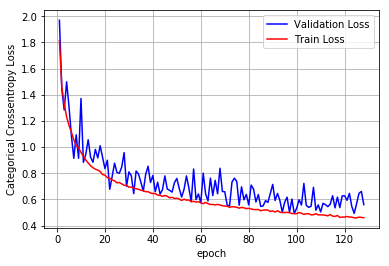

In [11]:
# Evaluating the model
score = model_7.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history_7.history['val_loss']
ty = history_7.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
#save to disk
model_json = model_7.to_json()
with open('model_7.json', 'w') as json_file:
    json_file.write(model_json)
model_7.save_weights('model_7.h5') 


# Now repeating the above process for 5 Convolution layer

# 5 Convolution Layers

In [19]:
from keras.layers import MaxPooling2D
# Initialising the model
model_5 = Sequential()

# Adding first conv layer
model_5.add(Conv2D(8, kernel_size=(5, 5),padding='same',activation='relu',input_shape=x_train.shape[1:]))

# Adding second conv layer
model_5.add(Conv2D(16, (5, 5), activation='relu'))

# Adding Maxpooling layer
model_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


# Adding Dropout
model_5.add(Dropout(0.25))

# Adding third conv layer
model_5.add(Conv2D(32, (5, 5),padding='same', activation='relu'))

# Adding Maxpooling layer
model_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding Dropout
model_5.add(Dropout(0.25))

# Adding fourth conv layer
model_5.add(Conv2D(64, (5, 5),padding='same',activation='relu'))

# Adding fifth conv layer
model_5.add(Conv2D(64, (5, 5), activation='relu'))

# Adding Maxpooling layer
model_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding Dropout
model_5.add(Dropout(0.25))

# Adding flatten layer
model_5.add(Flatten())

# Adding first hidden layer
model_5.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Batch Normalization
model_5.add(BatchNormalization())

# Adding Dropout
model_5.add(Dropout(0.5))

# Adding output layer
model_5.add(Dense(num_classes, activation='softmax'))

# Printing model Summary
print(model_5.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 8)         608       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        3216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 32)          0         
__________

In [20]:
# Compiling the model
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_5 = model_5.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,\
                    verbose=1,validation_data=(x_test,y_test))

Epoch 1/128
390/390 [==============================] - 22s 55ms/step - loss: 1.8424 - acc: 0.3008 - val_loss: 1.4924 - val_acc: 0.4461
Epoch 2/128
390/390 [==============================] - 21s 53ms/step - loss: 1.5590 - acc: 0.4265 - val_loss: 1.4410 - val_acc: 0.4833
Epoch 3/128
390/390 [==============================] - 21s 53ms/step - loss: 1.4484 - acc: 0.4745 - val_loss: 1.3351 - val_acc: 0.5221
Epoch 4/128
390/390 [==============================] - 21s 53ms/step - loss: 1.3641 - acc: 0.5067 - val_loss: 1.4476 - val_acc: 0.5103
Epoch 5/128
390/390 [==============================] - 20s 52ms/step - loss: 1.3048 - acc: 0.5346 - val_loss: 1.1611 - val_acc: 0.5961
Epoch 6/128
390/390 [==============================] - 21s 53ms/step - loss: 1.2543 - acc: 0.5559 - val_loss: 1.2459 - val_acc: 0.5721
Epoch 7/128
390/390 [==============================] - 21s 53ms/step - loss: 1.2189 - acc: 0.5712 - val_loss: 1.1429 - val_acc: 0.5949
Epoch 8/128
390/390 [==============================] - 

Test score: 0.5856034601449966
Test accuracy: 0.8075


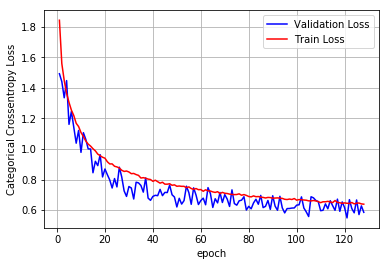

In [21]:
# Evaluating the model
score = model_5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history_5.history['val_loss']
ty = history_5.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
#save to disk
model_json1 = model_5.to_json()
with open('model_5.json', 'w') as json_file:
    json_file.write(model_json1)
model_5.save_weights('model_5.h5') 


# Result:
**We see that model with 7 convolution layer wis working good**